Let's donload the load prediction dataset for Kaagle.

In [94]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import textwrap
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import kendalltau
from sklearn.metrics import mutual_info_score
import re
import matplotlib.image as mpimg
import joypy

In [2]:
data = pd.read_csv("Loan_default.csv")

In [3]:
data.head()


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [4]:
data.tail()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
255342,8C6S86ESGC,19,37979,210682,541,109,4,14.11,12,0.85,Bachelor's,Full-time,Married,No,No,Other,No,0
255343,98R4KDHNND,32,51953,189899,511,14,2,11.55,24,0.21,High School,Part-time,Divorced,No,No,Home,No,1
255344,XQK1UUUNGP,56,84820,208294,597,70,3,5.29,60,0.50,High School,Self-employed,Married,Yes,Yes,Auto,Yes,0
255345,JAO28CPL4H,42,85109,60575,809,40,1,20.90,48,0.44,High School,Part-time,Single,Yes,Yes,Other,No,0
255346,ZTH91CGL0B,62,22418,18481,636,113,2,6.73,12,0.48,Bachelor's,Unemployed,Divorced,Yes,No,Education,Yes,0


In [5]:
n_cols = data.shape[1]
n_rows = data.shape[0]

In [6]:
#data.columns = data.columns.str.lower().str.replace(" ","_")
data.colums = data.columns = [re.sub(r'(?<=[a-z0-9])(?=[A-Z])', '_', col).lower() for col in data.columns]


C:\Users\Kuzey\AppData\Local\Temp\ipykernel_24812\2162447113.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.colums = data.columns = [re.sub(r'(?<=[a-z0-9])(?=[A-Z])', '_', col).lower() for col in data.columns]


In [7]:
data.head()

,loan_id,age,income,loan_amount,credit_score,months_employed,num_credit_lines,interest_rate,loan_term,dtiratio,education,employment_type,marital_status,has_mortgage,has_dependents,loan_purpose,has_co_signer,default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [8]:
data.tail()

,loan_id,age,income,loan_amount,credit_score,months_employed,num_credit_lines,interest_rate,loan_term,dtiratio,education,employment_type,marital_status,has_mortgage,has_dependents,loan_purpose,has_co_signer,default
255342,8C6S86ESGC,19,37979,210682,541,109,4,14.11,12,0.85,Bachelor's,Full-time,Married,No,No,Other,No,0
255343,98R4KDHNND,32,51953,189899,511,14,2,11.55,24,0.21,High School,Part-time,Divorced,No,No,Home,No,1
255344,XQK1UUUNGP,56,84820,208294,597,70,3,5.29,60,0.50,High School,Self-employed,Married,Yes,Yes,Auto,Yes,0
255345,JAO28CPL4H,42,85109,60575,809,40,1,20.90,48,0.44,High School,Part-time,Single,Yes,Yes,Other,No,0
255346,ZTH91CGL0B,62,22418,18481,636,113,2,6.73,12,0.48,Bachelor's,Unemployed,Divorced,Yes,No,Education,Yes,0


In [9]:
#https://tosinharold.medium.com/enhancing-correlation-matrix-heatmap-plots-with-p-values-in-python-41bac6a7fd77
data_new = data.copy()

In [10]:
data_new.describe()

,age,income,loan_amount,credit_score,months_employed,num_credit_lines,interest_rate,loan_term,dtiratio,default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


In [11]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   loan_id           255347 non-null  object 
 1   age               255347 non-null  int64  
 2   income            255347 non-null  int64  
 3   loan_amount       255347 non-null  int64  
 4   credit_score      255347 non-null  int64  
 5   months_employed   255347 non-null  int64  
 6   num_credit_lines  255347 non-null  int64  
 7   interest_rate     255347 non-null  float64
 8   loan_term         255347 non-null  int64  
 9   dtiratio          255347 non-null  float64
 10  education         255347 non-null  object 
 11  employment_type   255347 non-null  object 
 12  marital_status    255347 non-null  object 
 13  has_mortgage      255347 non-null  object 
 14  has_dependents    255347 non-null  object 
 15  loan_purpose      255347 non-null  object 
 16  has_co_signer     25

In [12]:
df_numerical = data_new.select_dtypes(include=np.number)
df_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   age               255347 non-null  int64  
 1   income            255347 non-null  int64  
 2   loan_amount       255347 non-null  int64  
 3   credit_score      255347 non-null  int64  
 4   months_employed   255347 non-null  int64  
 5   num_credit_lines  255347 non-null  int64  
 6   interest_rate     255347 non-null  float64
 7   loan_term         255347 non-null  int64  
 8   dtiratio          255347 non-null  float64
 9   default           255347 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 19.5 MB


In [13]:
corr = df_numerical.corr(method='kendall')

In [14]:
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
np.fill_diagonal(mask, False)

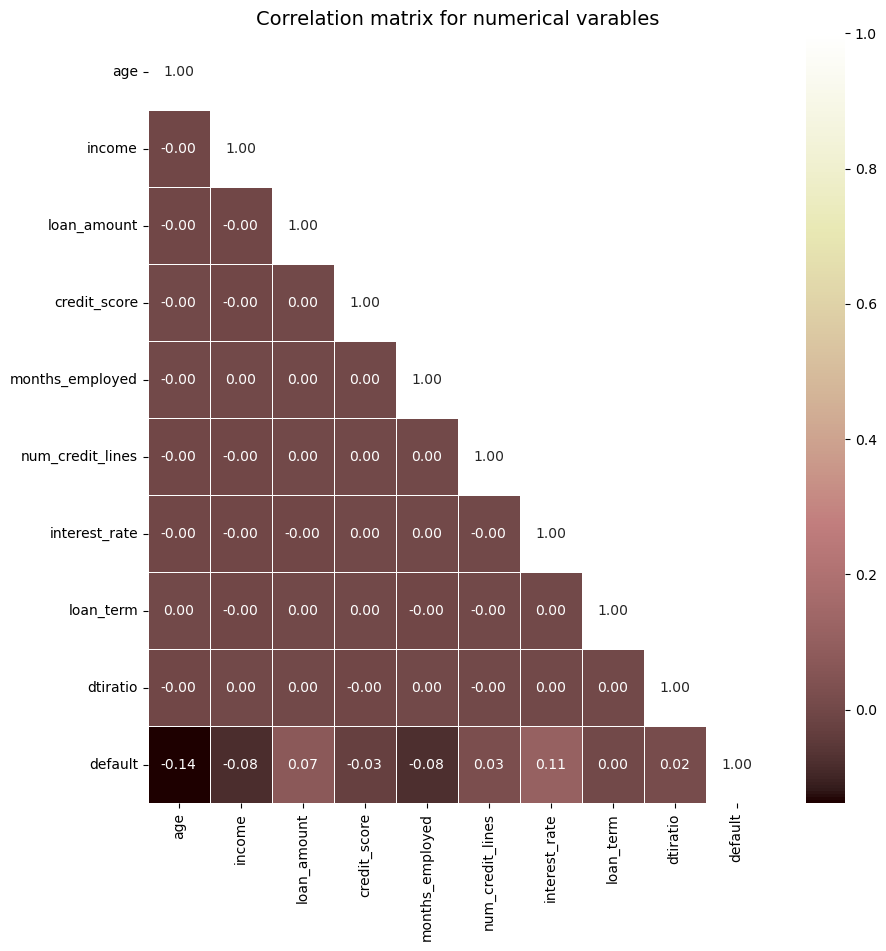

In [15]:
fig, ax = plt.subplots(figsize=(10,10))
plt.title("Correlation matrix for numerical varables" , fontsize=14)

# Generate the heatmap including the mask
heatmap = sns.heatmap(corr,
                      annot=True,
                      annot_kws={"fontsize": 10},
                      fmt='.2f',
                      linewidths=0.5,
                      cmap='pink',
                      mask=mask, # the mask has been included here
                      ax=ax)

# Display our plot
plt.show()

In [16]:
# Create the mutual information matrix
df_categorical = data_new.select_dtypes(include=object)
df_categorical["default"] = data_new["default"]
del df_categorical["loan_id"]

           Feature  Mutual Information
1  employment_type            0.001050
6    has_co_signer            0.000766
4   has_dependents            0.000602
0        education            0.000418
2   marital_status            0.000397
3     has_mortgage            0.000261
5     loan_purpose            0.000256


C:\Users\Kuzey\AppData\Local\Temp\ipykernel_24812\2597856306.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Mutual Information', y='Feature', data=mi_scores_df, palette='pink')


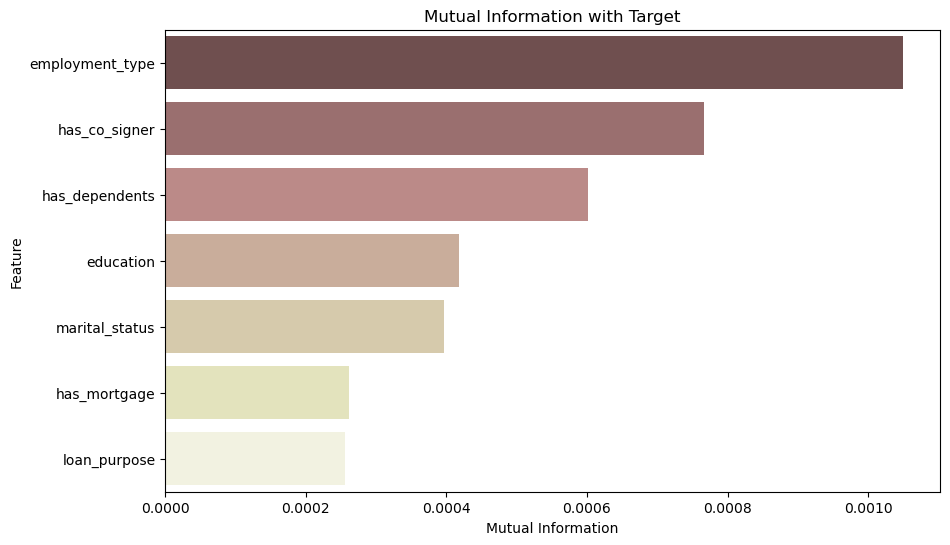

In [17]:

# Assuming the target column is named 'target'
target_column = 'default'

# Calculate mutual information between the target and each feature
def calculate_mutual_information_with_target(df, target_column):
    features = df.drop(columns=[target_column]).columns
    mi_scores = {}

    for feature in features:
        mi_score = mutual_info_score(df[target_column].values, df[feature].values)
        mi_scores[feature] = mi_score

    return mi_scores

# Get mutual information scores
mi_scores = calculate_mutual_information_with_target(df_categorical, target_column)

# Convert to a DataFrame for easier visualization
mi_scores_df = pd.DataFrame(list(mi_scores.items()), columns=['Feature', 'Mutual Information'])

# Sort by mutual information score
mi_scores_df = mi_scores_df.sort_values(by='Mutual Information', ascending=False)

# Print the scores
print(mi_scores_df)

# Visualize the mutual information scores
plt.figure(figsize=(10, 6))
sns.barplot(x='Mutual Information', y='Feature', data=mi_scores_df, palette='pink')
plt.title("Mutual Information with Target")
plt.show()

In [18]:
# Create the mutual information matrix
df_categorical = data_new.select_dtypes(include=object)
del df_categorical["loan_id"]
# Calculate mutual information for categorical variables
def calculate_mutual_information_categorical(df):
    mi_matrix = pd.DataFrame(index=df.columns, columns=df.columns, dtype=float)

    for feature_1 in df.columns:
        for feature_2 in df.columns:
            if feature_1 != feature_2:
                # Calculate mutual information score between the two features
                mi = mutual_info_score(df[feature_1], df[feature_2])
                mi_matrix.loc[feature_1, feature_2] = mi
            else:
                mi_matrix.loc[feature_1, feature_2] = np.nan  # Set diagonal to NaN for readability

    return mi_matrix

# Create the mutual information matrix
mi_matrix = calculate_mutual_information_categorical(df_categorical)


In [19]:
mask2 = np.zeros_like(mi_matrix, dtype=bool)
mask2[np.triu_indices_from(mask2)] = True
np.fill_diagonal(mask2, False)

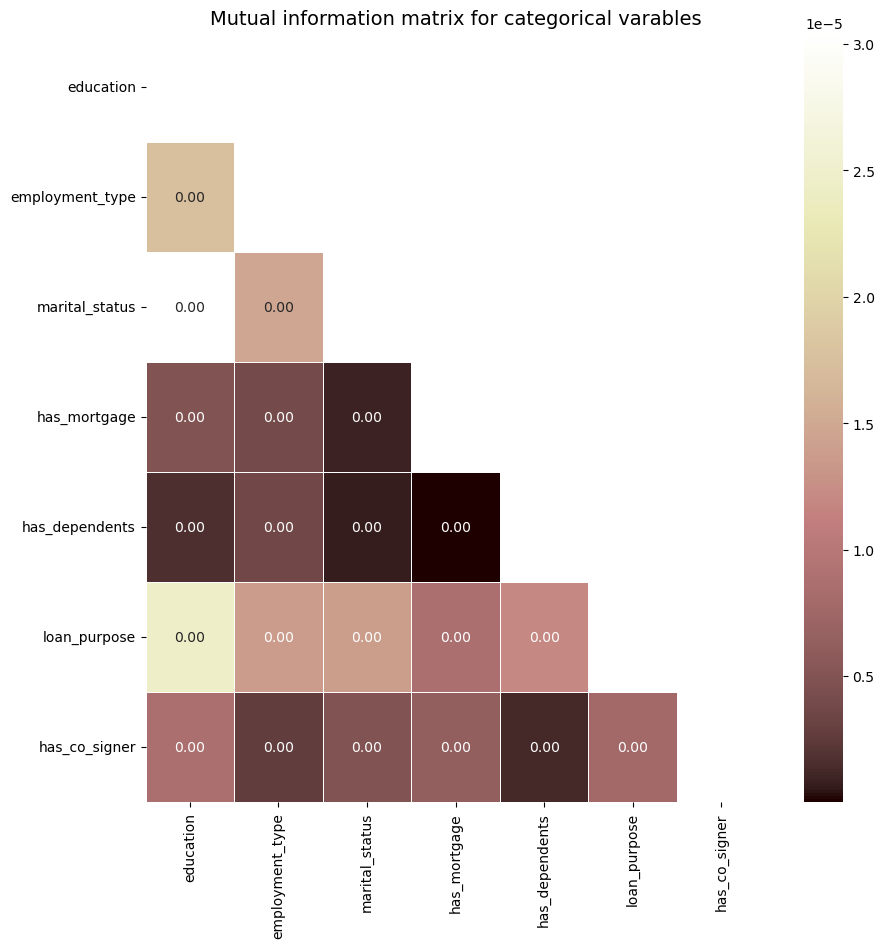

In [20]:
fig, ax = plt.subplots(figsize=(10,10))
plt.title("Mutual information matrix for categorical varables" , fontsize=14)

# Generate the heatmap including the mask
heatmap = sns.heatmap(mi_matrix,
                      annot=True,
                      annot_kws={"fontsize": 10},
                      fmt='.2f',
                      linewidths=0.5,
                      cmap='pink',
                      mask=mask2, # the mask has been included here
                      ax=ax)

# Display our plot
plt.show()

In [21]:
default = data_new[data_new["default"]==1]
print(len(default))
nondefault = data_new[data_new["default"]==0]
print(len(nondefault))

29653
225694


C:\Users\Kuzey\AppData\Local\Temp\ipykernel_24812\2673598202.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= "default", data = data_new, palette = "pink")


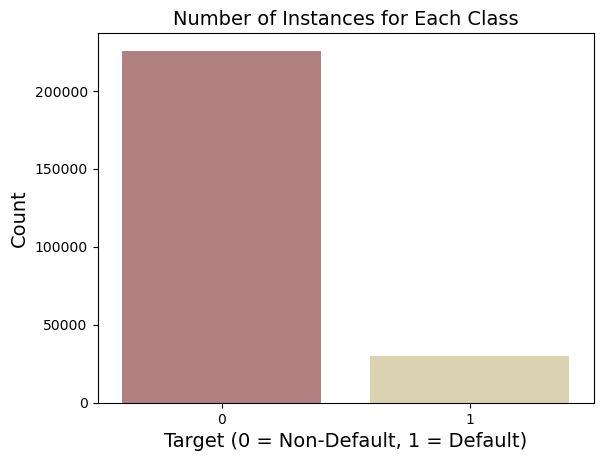

In [22]:
plt.figure()
sns.countplot(x= "default", data = data_new, palette = "pink")
plt.title("Number of Instances for Each Class" , fontsize=14)
plt.xlabel("Target (0 = Non-Default, 1 = Default)", fontsize =14)
plt.ylabel("Count", fontsize =14)
plt.show()

Index(['age', 'income', 'loan_amount', 'credit_score', 'months_employed',
       'num_credit_lines', 'interest_rate', 'loan_term', 'dtiratio',
       'default'],
      dtype='object')
['Age', 'Income', 'Loan Amount', 'Credit Score', 'Months Employed', 'Num Credit Lines', 'Interest Rate', 'Loan Term', 'DTI Ratio', 'default']


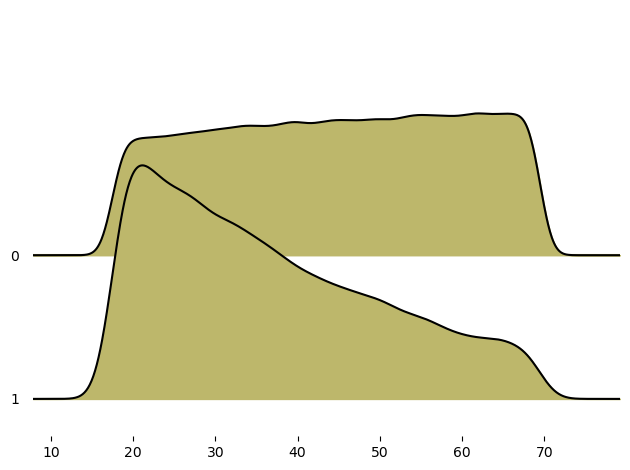

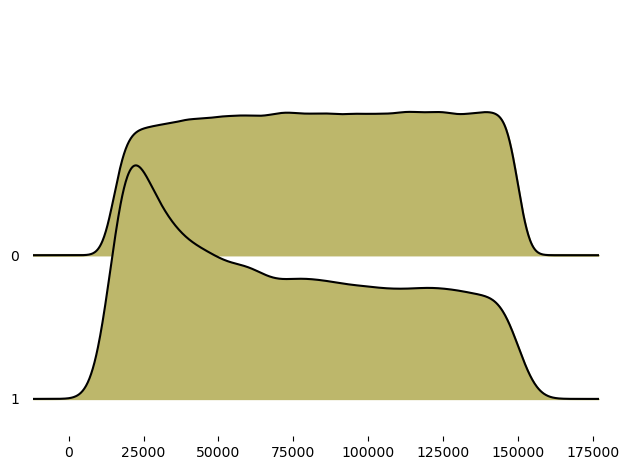

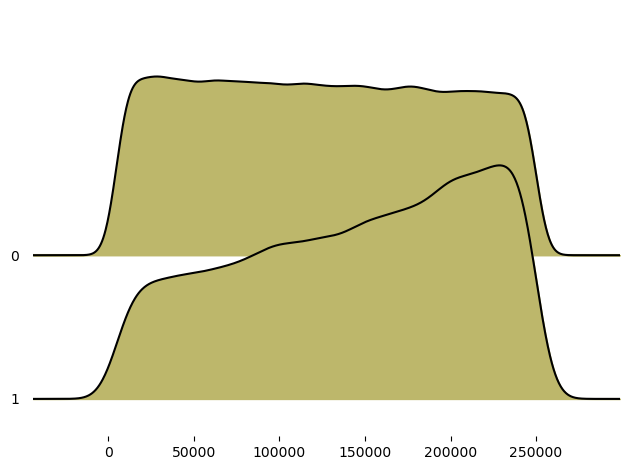

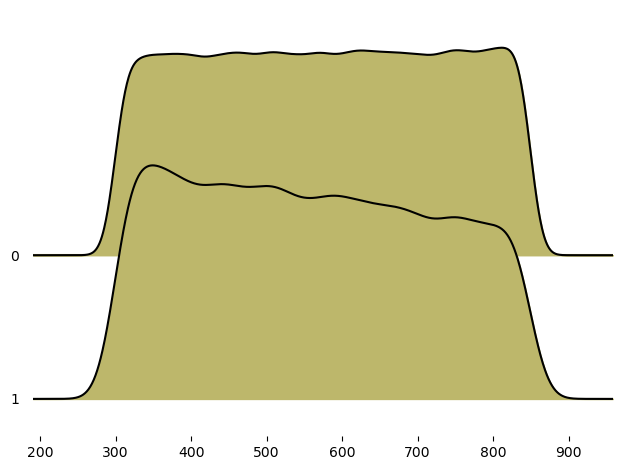

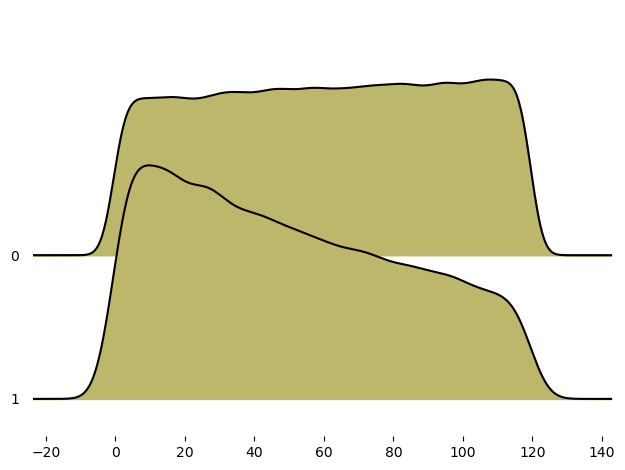

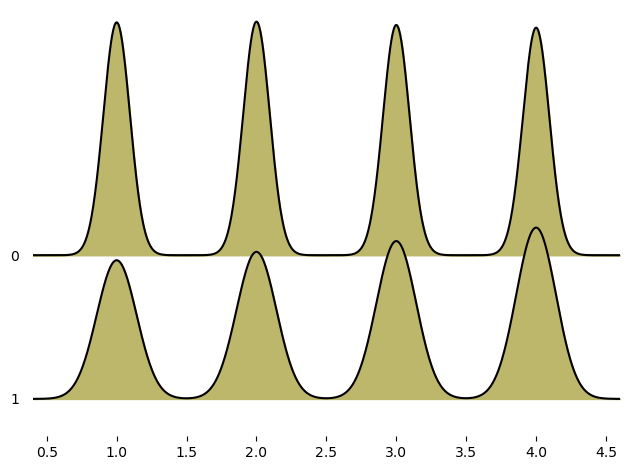

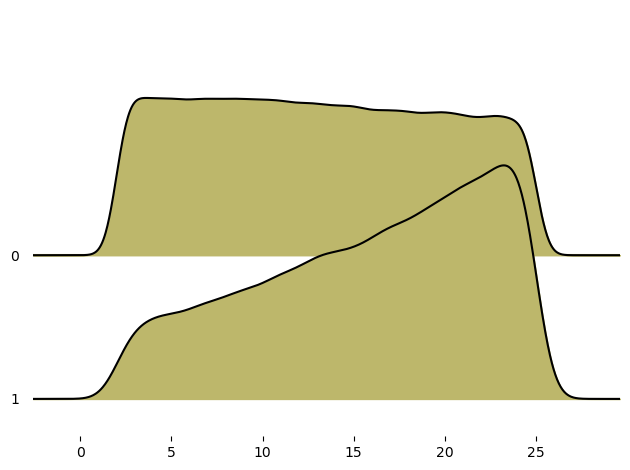

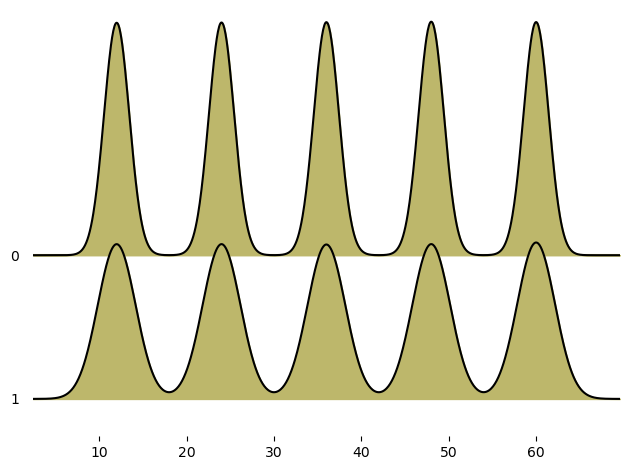

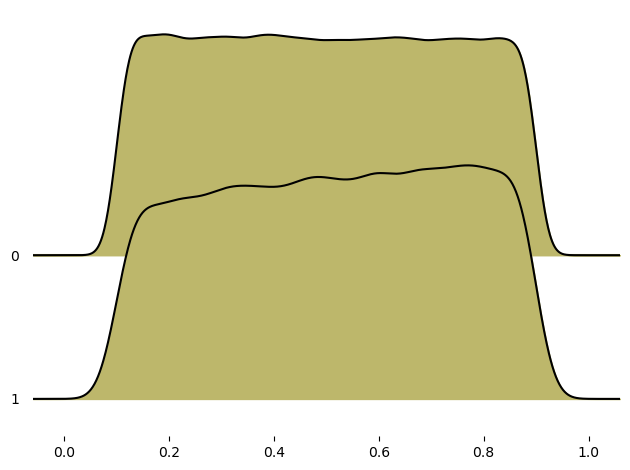

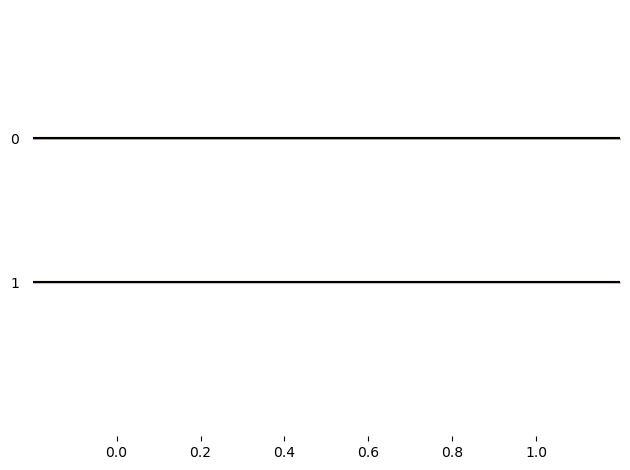

In [115]:
#del df_numerical["default"]
df_numerical = data_new.select_dtypes(include=np.number)
print(df_numerical.columns)
list_cols = ["Age", "Income", "Loan Amount", "Credit Score", "Months Employed", "Num Credit Lines", "Interest Rate", "Loan Term", "DTI Ratio", "default"]
df_numerical = df_numerical.set_axis(list_cols, axis=1)
list_numerical = list(df_numerical.columns)
print(list_numerical)
for col in list_numerical:
    fig, axes = joypy.joyplot(df_numerical, by="default", column=col,hist=False, overlap=2, color="darkkhaki") 
    #plt.title(f"Distribution of {col} variable", fontsize=16)
    plt.savefig(f"joy_plot_{col}.png".format(idx=col),bbox_inches="tight")
    

C:\Users\Kuzey\AppData\Local\Temp\ipykernel_24812\2120099927.py:26: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(wspace=0.1, hspace=0.1)  # Smaller values reduce whitespace between subplots


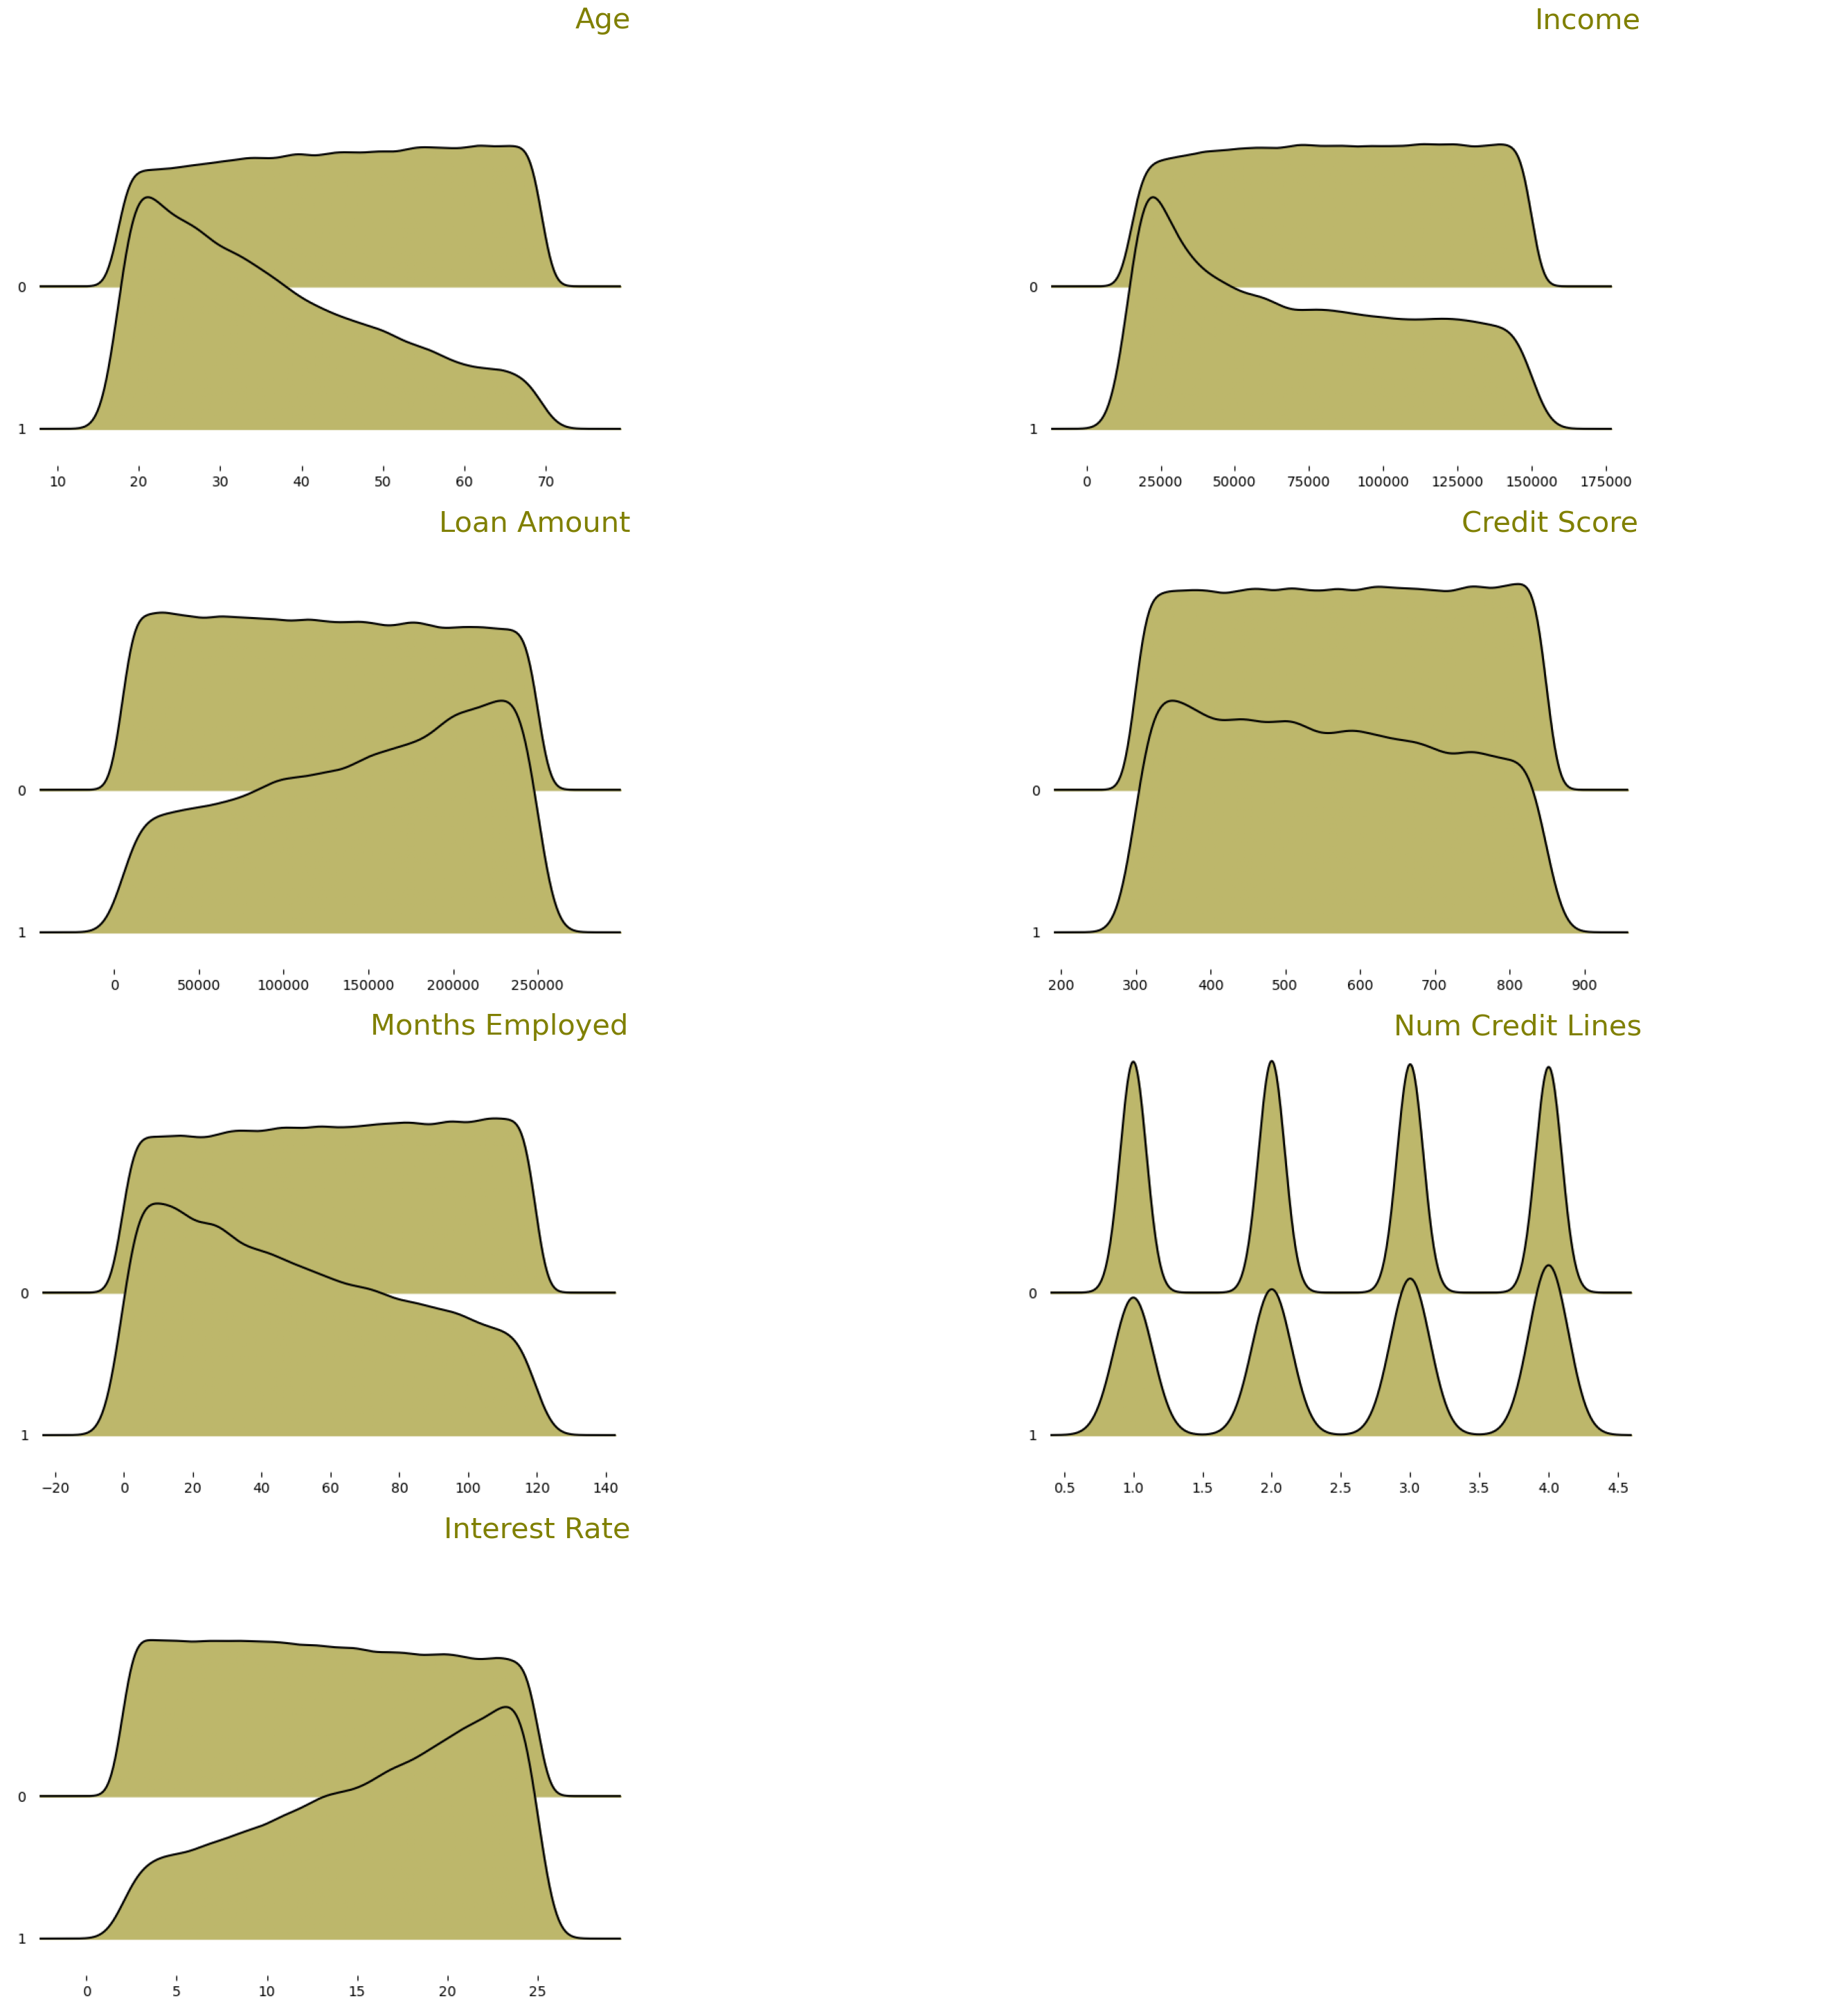

In [141]:
# Sample data for each plot
#data = [np.random.normal(loc=i, scale=1, size=100) for i in range(7)]
image_paths = ["joy_plot_Age.png", "joy_plot_Income.png", "joy_plot_Loan Amount.png", "joy_plot_Credit Score.png", "joy_plot_Months Employed.png",
        "joy_plot_Num Credit Lines.png", "joy_plot_Interest Rate.png", "joy_plot_Loan Term.png","joy_plot_DTI Ratio.png"]

list_cols = ["Age", "Income", "Loan Amount", "Credit Score", "Months Employed", "Num Credit Lines", "Interest Rate", "Loan Term", "DTI Ratio"]
# Create a figure with subplots arranged in a 3x3 grid, leaving space for seven images
fig, axes = plt.subplots(4, 2 ,figsize = (29,29), constrained_layout=True)  # 3x3 grid

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Load and plot each image
for i in range(7):
    img = mpimg.imread(image_paths[i])  # Load image
    axes[i].imshow(img)                 # Display image
    axes[i].axis("off")                 # Hide axis
    axes[i].set_title(f"{list_cols[i]}",fontsize=30 , loc='right',  color="olive")   # Set title for each image
    #axes[i].set_xlabel(f"{list_cols[i]}", fontsize=12)
    
# Hide any unused subplots
for j in range(7, len(axes)):
    axes[j].axis("off")

# Adjust layout to reduce whitespace
plt.subplots_adjust(wspace=0.1, hspace=0.1)  # Smaller values reduce whitespace between subplots


plt.xticks(fontsize=30)
# Save the figure with a high resolution
fig.savefig("joy_plots_numeric.png", dpi=300, bbox_inches='tight')

plt.show()